### Autoencoders

In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = ''
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/cs231n/project')

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
# %cd /content/drive/My Drive/cs231n/project

Mounted at /content/drive


In [2]:
import os
import cv2
from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from moviepy.editor import *

import os
import moviepy.video.io.ImageSequenceClip

from IPython.display import HTML
from base64 import b64encode

import PIL

In [3]:
%cd /content/drive/My Drive/cs231n/project/Dataset 
!pwd

/content/drive/My Drive/cs231n/project/Dataset
/content/drive/My Drive/cs231n/project/Dataset


In [4]:
np.random.seed(seed = 311)

def process_image(image):
    return image/255
    
def pixalate_image(image):
  small_image = cv2.resize(image, (128, 128)  , interpolation = cv2.INTER_AREA) 
  low_res_image = cv2.resize(small_image, (256, 256), interpolation =  cv2.INTER_AREA)
  low_res_image = np.array(low_res_image) + np.random.rand(256, 256, 3) * 50 # add gaussian noise

  return low_res_image

def video_to_images(video_path, save_paths, KPS = 1, ext = ".jpg"):
  # creating a video capture object
  video_object = cv2.VideoCapture(video_path)

  fps = round(video_object.get(cv2.CAP_PROP_FPS))

  currentframe = 0
  lr_images = []
  hr_images = []

  print ('Converting video to images..........')
  while True:   
    ret, hr_frame = video_object.read()
   
    if ret: # continue if more frames exit
      # resize 
      hr_frame = cv2.resize(hr_frame, (512, 512), interpolation = cv2.INTER_AREA)
      # reduce resolution   
      lr_frame = pixalate_image(hr_frame)
      
      # save 
      name = save_paths["lr"] + str(currentframe) + 'lr_' +  ext
      name1 = save_paths["hr"] + str(currentframe) + 'hr_' +  ext
      cv2.imwrite(name, lr_frame)
      cv2.imwrite(name1, hr_frame)

      # normalize
      hr_frame = process_image(hr_frame)
      lr_frame = process_image(lr_frame)

      hr_images.append(hr_frame)
      lr_images.append(lr_frame)
      
      if currentframe == 500: break
      currentframe += 1
    else:
        break
    
  video_object.release()
  cv2.destroyAllWindows()
  print ('Conversion Completed !!!!!!!')

  return np.array(hr_images), np.array(lr_images)

def images_to_video(video_name, image_path, video_path):
  print ('Converting images to video........')
  
  video_object = cv2.VideoCapture(video_path)
  fps = round(video_object.get(cv2.CAP_PROP_FPS))

  image_files = [image_path+'/'+img for img in os.listdir(image_path) if img.endswith(".jpg")]
  clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)

  # add audio
  # audioclip = AudioFileClip(audio_filename)
  # audioclip.set_duration(10)
  # video.set_audio(audioclip)
  # video.write_videofile(video_namevideo_name, audio=True, threads=4)

  clip.write_videofile(video_name)
  print ('Conversion Completed !!!!!!!')

In [16]:
# Load saved model
model_to_use = "cnn"

if model_to_use == "cnn":
  saved_model = 'model_cnn_final/'
elif model_to_use == "vae":
  saved_model = 'VAE/'
elif model_to_use == "vae_finale":
  saved_model = 'vae_finale/'

model = keras.models.load_model(saved_model)

In [6]:
# convert hr video to 512 x 512 hr and 256 x 256 lr images
VIDEO_PATH = "main_video.mp4"

save_paths = {"lr": "./images/low_res/",
              "hr": "./images/high_res/"}

hr_images, lr_images = video_to_images(VIDEO_PATH, save_paths)

Converting video to images..........
Conversion Completed !!!!!!!


(512, 512, 3)
(256, 256, 3)


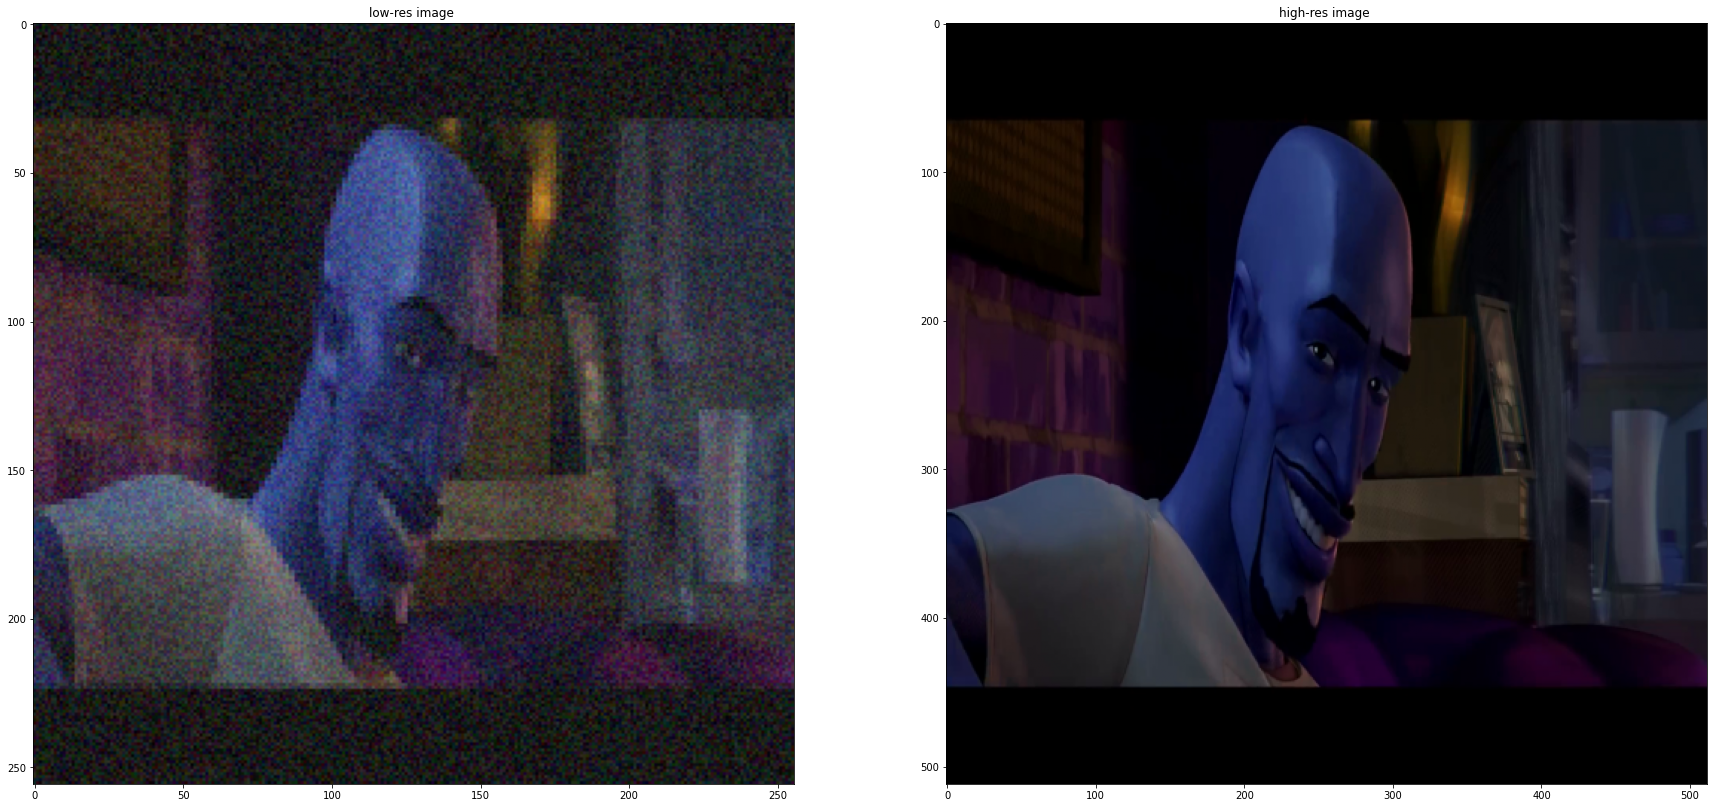

<Figure size 2880x2880 with 0 Axes>

In [17]:
# show results
print(hr_images[0].shape)
print(lr_images[0].shape)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,30))
plt.figure(figsize=(40,40))
ax2.imshow(hr_images[20])
ax2.title.set_text("high-res image ")
ax1.imshow(lr_images[20])
ax1.title.set_text("low-res image ")

In [18]:
# enhance
predict_y = model.predict(lr_images)

In [19]:
print(predict_y.shape)
print(predict_y.shape)
print(lr_images.shape)

(230, 512, 512, 3)
(230, 512, 512, 3)
(230, 256, 256, 3)


In [20]:
# save enahnced images
for i, image in enumerate(predict_y):
  save_path = "./image2/enhanced/"
  name = save_path + str(i) +  ".jpg"
  image = image * 255  # reverse normalization
  cv2.imwrite(name, image)

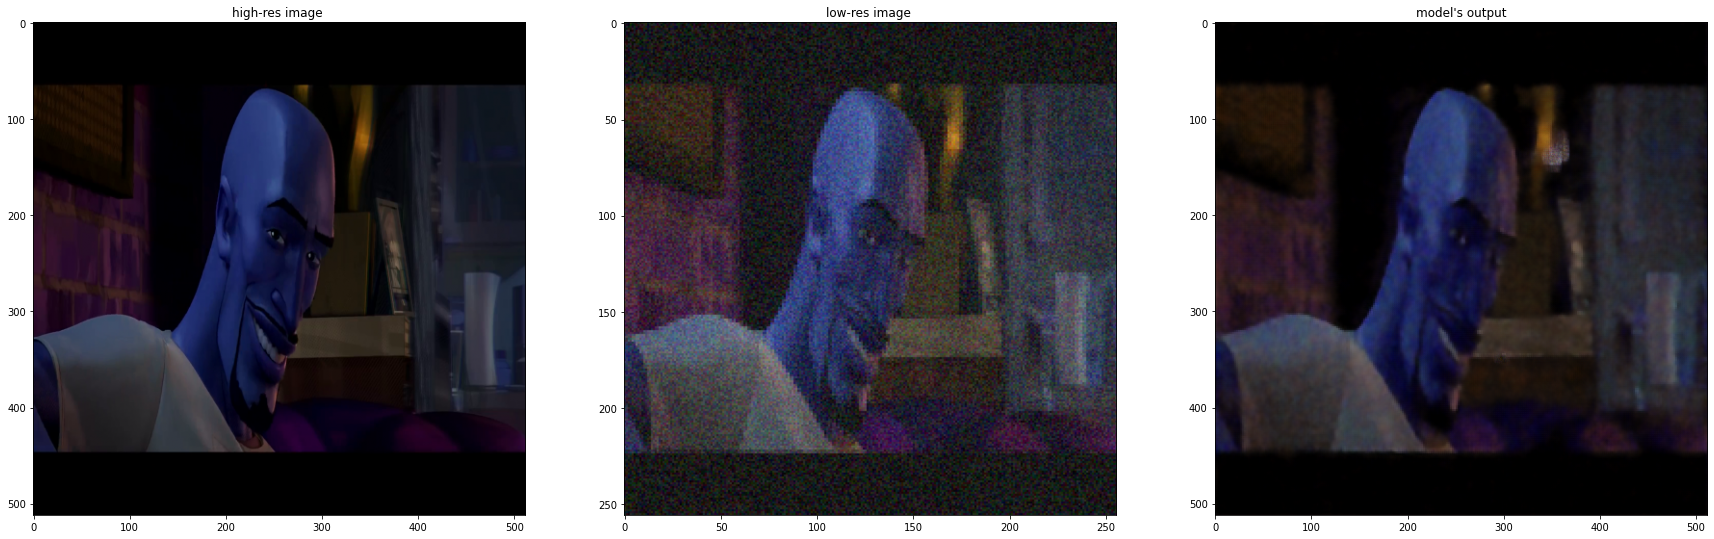

<Figure size 2880x2880 with 0 Axes>

In [21]:
# show results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,30))
plt.figure(figsize=(40,40))
ax1.imshow(hr_images[20])
ax1.title.set_text("high-res image ")
ax2.imshow(lr_images[20])
ax2.title.set_text("low-res image ")
ax3.imshow(predict_y[20])
ax3.title.set_text("model's output")

In [27]:
# convert images to video
# enhanced_video_name = "enhanced_video_.mp4"
# original_hr_video_name = "original_hr_video_.mp4"
# original_lr_video_name = "original_lr_video_.mp4"
# SAVE_PATH0 = "./images/low_res/"
# SAVE_PATH1 = "./images/high_res/"
# SAVE_PATH2 = "./images/enhanced/"

SAVE_PATH_LR_IM = "./images/low_res/"
SAVE_PATH_HR_IM = "./images/high_res/"
SAVE_PATH_EN_IM = "./images/enhanced/"

all_paths = {"hr": ("original_hr_cartoon_video_.mp4", SAVE_PATH_HR_IM), 
                  "lr": ("original_lr_cartoon_video_.mp4", SAVE_PATH_LR_IM),
                  "enhanced": ("enhanced_real_video_vae_finale.mp4", SAVE_PATH_EN_IM)}


# # resize : helper
# def resize(path, size):
#     for img_name in os.listdir(path):
#       if img_name.endswith(".jpg"):
#         image = cv2.imread(os.path.join(path, img_name))
#         new_image = cv2.resize(image, size, interpolation =  cv2.INTER_AREA)
#         cv2.imwrite(os.path.join(path, img_name), new_image)

original_hr_video = images_to_video(all_paths["hr"][0], all_paths["hr"][1], VIDEO_PATH)
original_lr_video = images_to_video(all_paths["lr"][0], all_paths["lr"][1], VIDEO_PATH)
enhanced_video = images_to_video(all_paths["enhanced"][0], all_paths["enhanced"][1], VIDEO_PATH)

Converting images to video........
[MoviePy] >>>> Building video original_hr_cartoon_video_.mp4
[MoviePy] Writing video original_hr_cartoon_video_.mp4


100%|██████████| 230/230 [00:02<00:00, 77.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: original_hr_cartoon_video_.mp4 

Conversion Completed !!!!!!!
Converting images to video........
[MoviePy] >>>> Building video original_lr_cartoon_video_.mp4
[MoviePy] Writing video original_lr_cartoon_video_.mp4


100%|██████████| 230/230 [00:02<00:00, 89.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: original_lr_cartoon_video_.mp4 

Conversion Completed !!!!!!!
Converting images to video........
[MoviePy] >>>> Building video enhanced_real_video_vae_finale.mp4
[MoviePy] Writing video enhanced_real_video_vae_finale.mp4


100%|██████████| 230/230 [00:06<00:00, 35.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: enhanced_real_video_vae_finale.mp4 

Conversion Completed !!!!!!!


In [28]:
#. display video
mp4 = open(all_paths["hr"][0],'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [29]:
#. display video
mp4 = open(all_paths["lr"][0],'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [30]:
#. display video
mp4 = open(all_paths["enhanced"][0],'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [31]:
''' 
PIPELINE: hr video -> hr images -> lr images -> model -> enhanced images -> enhanced video
'''

SAVE_PATH_LR_IM = "./images/low_res/"
SAVE_PATH_HR_IM = "./images/high_res/"
SAVE_PATH_EN_IM = "./images/enhanced/"
VIDEO_PATH = "./boondocks.3gp"

load_paths = {"hr": ("original_hr_video_.mp4", SAVE_PATH_HR_IM), 
                  "lr": ("original_lr_video_.mp4", SAVE_PATH_LR_IM),
                  "enhanced": ("enhanced_video_.mp4", SAVE_PATH_EN_IM)}

save_paths = {"hr": ("original_hr_video_.mp4", "./images/high_res/"), 
                  "lr": ("original_lr_video_.mp4", "./images/low_res/")}


def display(video_name):
  mp4 = open(all_paths["enhanced"][0],'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

  HTML("""
  <video controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url)


def pipeline(high_res_video_path, save_paths, model, load_paths):
  # convert hr video to 512 x 512 hr and 256 x 256 lr images
  hr_images, lr_images = video_to_images(high_res_video_path, save_paths)

  # convert to low res images and save on drive
  lr_images = video_to_images(high_res_video_path, all_paths) 
  # enhance low res images to high res
  enhanced_images = model.predict(lr_images)
  
  # save enhanced images
  for i, image in enumerate(predict_y):
    save_path = "./images/enhanced/"
    name = save_path + str(i) +  ".jpg"
    image = image * 255  # reverse normalization
    cv2.imwrite(name, image)

  # convert to video and save on drive
  images_to_video(load_paths["hr"][0], load_paths["hr"][1])
  images_to_video(load_paths["lr"][0], load_paths["lr"][1])
  images_to_video(load_paths["enhanced"][0], load_paths["enhanced"][1])

  # display all videos
  display(load_paths["hr"][0])
  display(load_paths["lr"][0])
  display(load_paths["enhanced"][0])
